In [1]:
from Angrybird import AngryBird
import numpy as np
import matplotlib.pyplot as plt

In [2]:
env = AngryBird()

In [3]:
meanx = np.load("meanx.npy")
meany = np.load("meany.npy")
stdx = np.load("stdx.npy")
stdy = np.load("stdy.npy")

In [37]:
def test_coeff(coeff, display=True):
    state = env.reset()
    for i in range(10):
        if i == 0:
            state, reward, done, _ = env.step(np.array([0., 0.]))
        else:
            force = np.array([-(state[1] - meanx[i-1]) * coeff * stdx[i-1], 
                              -(state[2] - meany[i-1]) * coeff * stdy[i-1]])
            #print(force)
            state, reward, done, _ = env.step(force)
        #print(reward)
    if display:
        traj = np.array(env.trajectoire)
        plt.plot(traj[:, 1], traj[:, 2])
        plt.scatter(traj[-1][1], traj[-1][2])
        #print(traj[-10:])
    return reward

In [52]:
%%time
mean_rewards = []
for l in np.arange(0.003, 0.028, step=0.0001):
    coeff = l
    rewards = []
    for j in range(1000):
        rewards.append(test_coeff(coeff, display=False))
    mean_rewards.append([l, np.mean(rewards)])
mean_rewards = np.array(mean_rewards)
np.where(mean_rewards[:, 1] == mean_rewards[:, 1].min())

CPU times: user 7min 12s, sys: 54.7 ms, total: 7min 12s
Wall time: 7min 13s


(array([219]),)

<IPython.core.display.Javascript object>


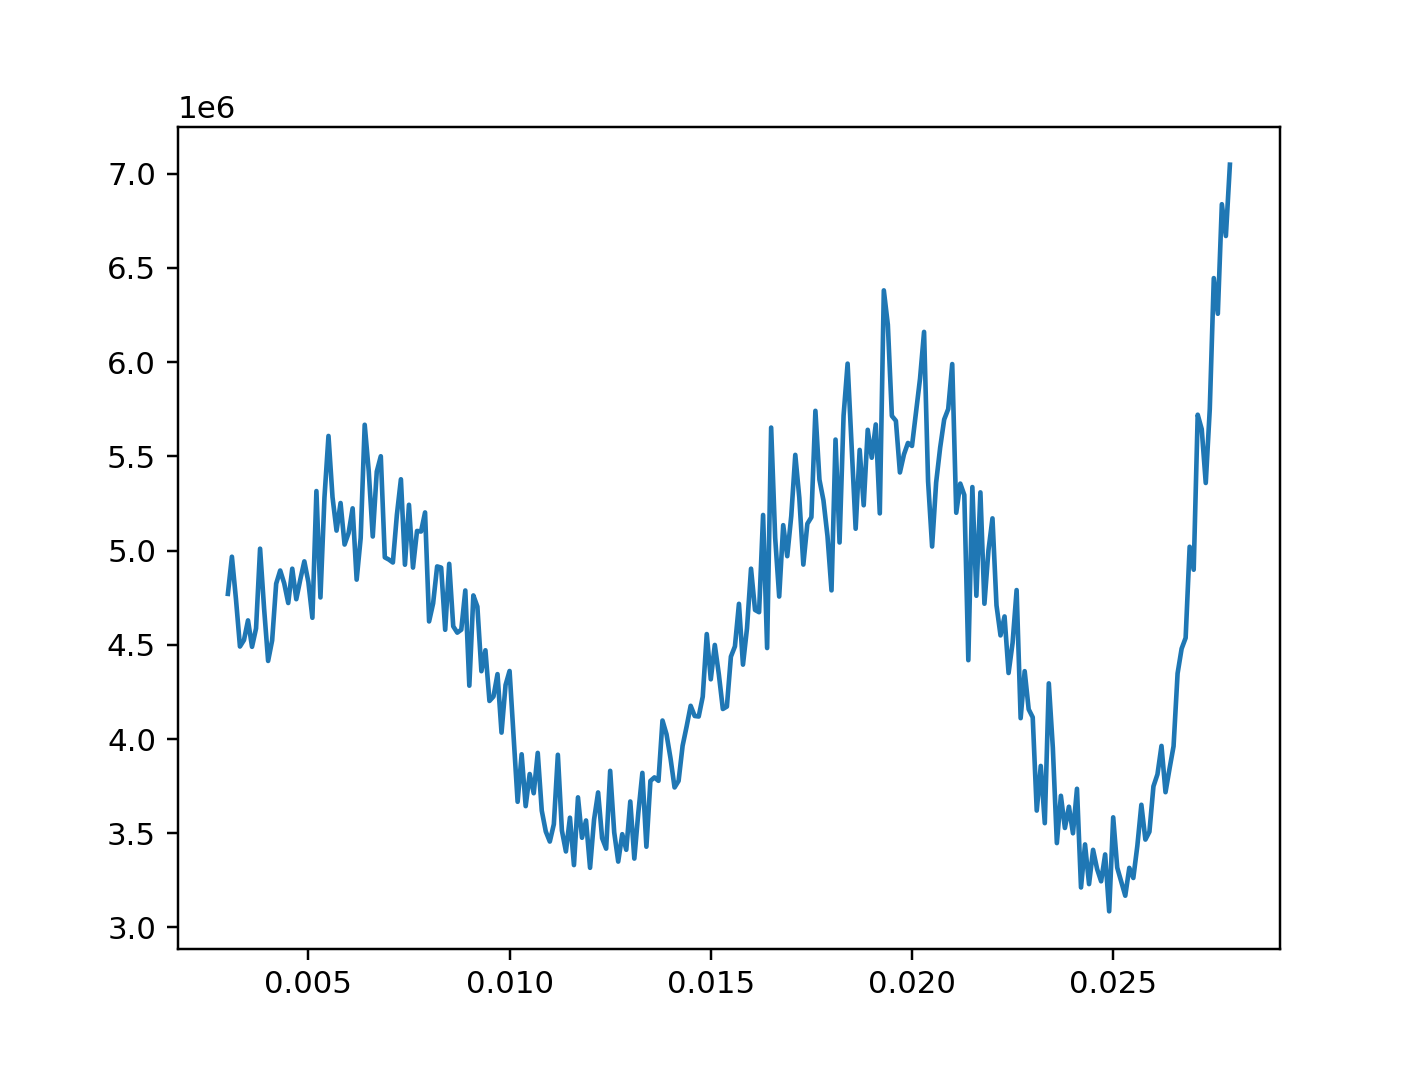

In [53]:
%matplotlib notebook
plt.figure()
plt.plot(mean_rewards[:, 0], mean_rewards[:, 1])

In [54]:
mean_rewards[219]

array([2.49000000e-02, 3.08564587e+06])

<IPython.core.display.Javascript object>


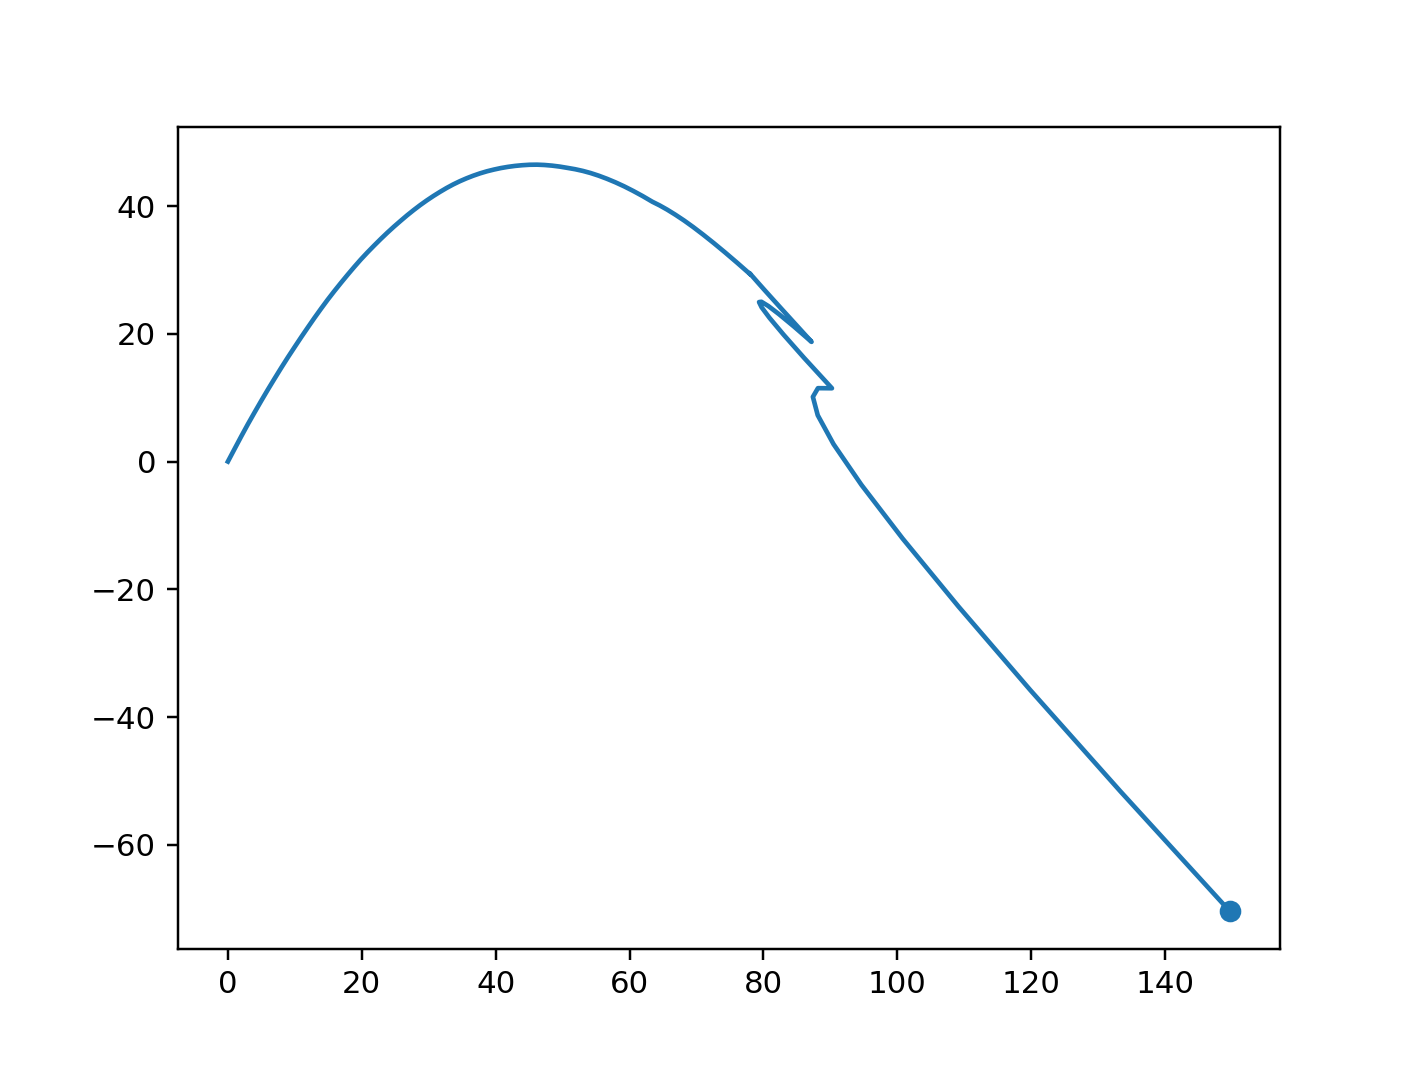

89670.67372781638

In [59]:
plt.figure()
test_coeff(0.0249)

<IPython.core.display.Javascript object>


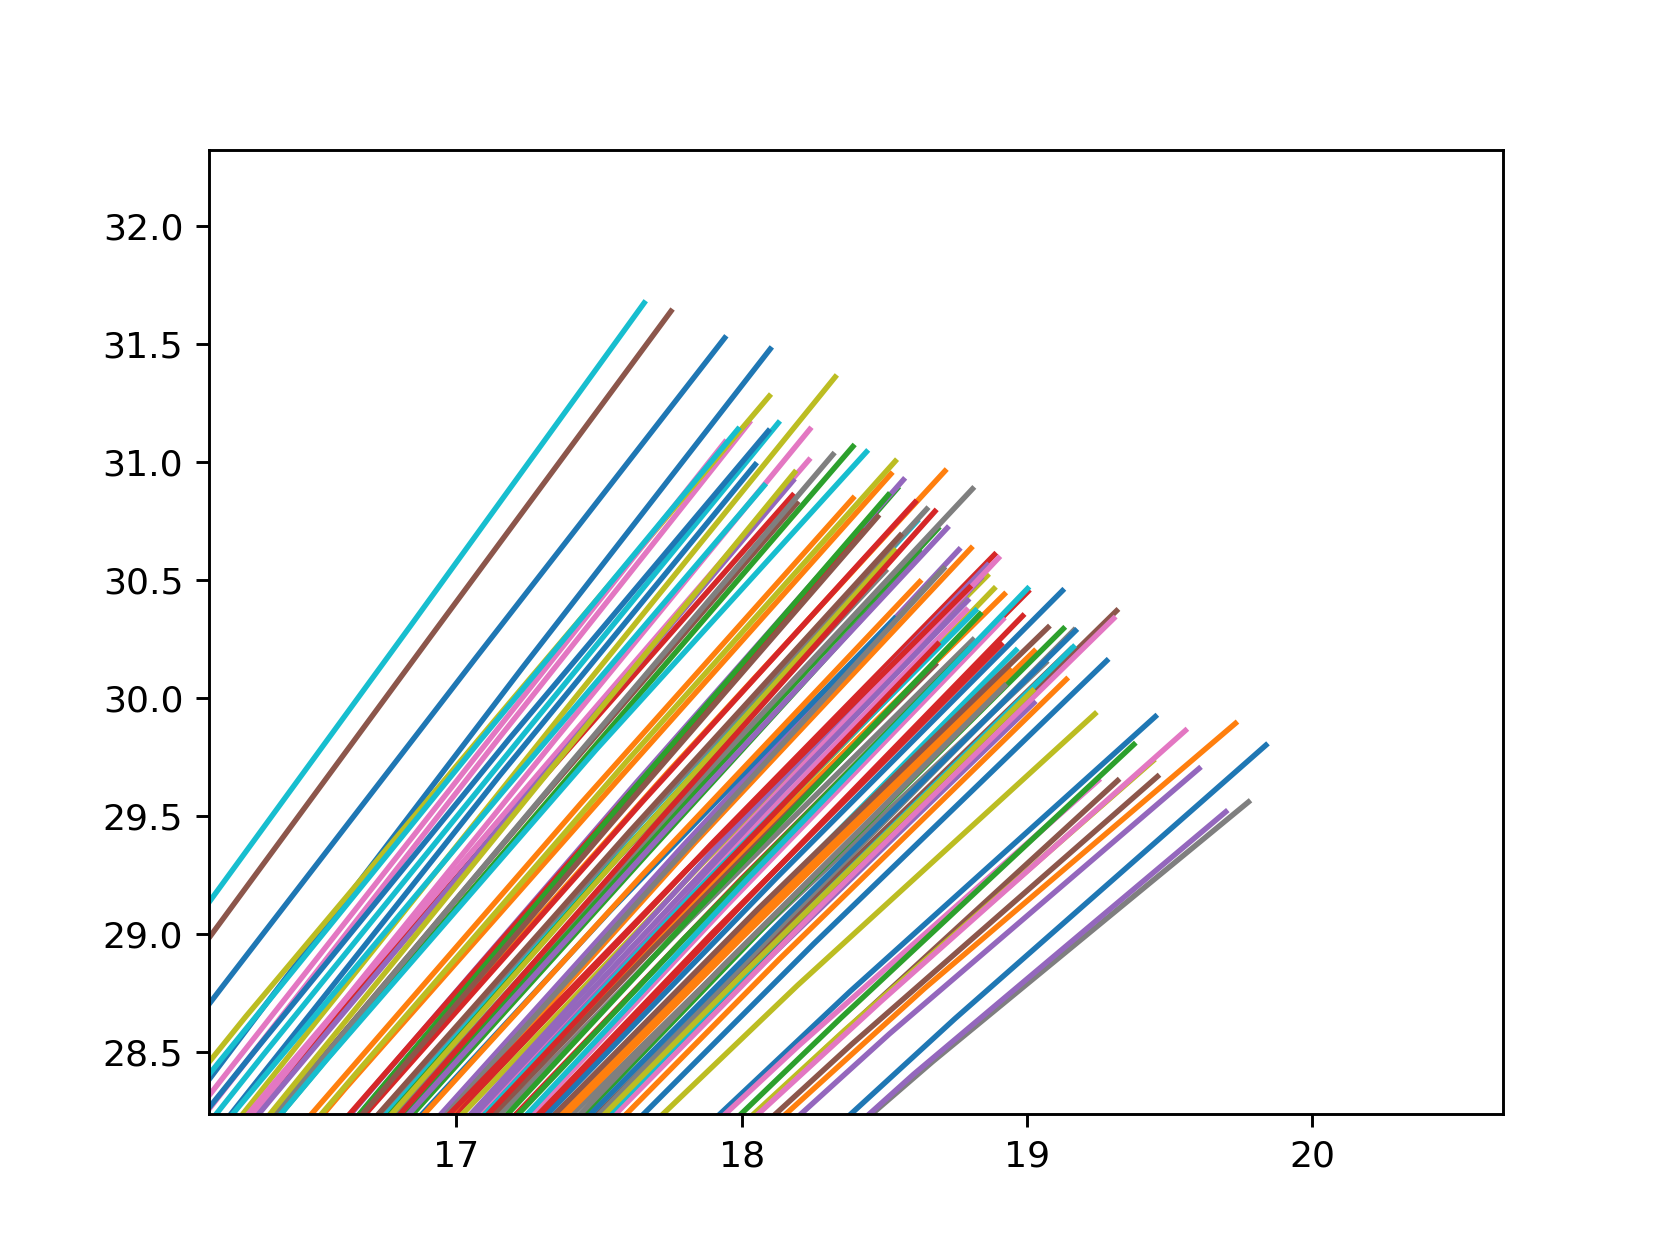

In [14]:
%matplotlib notebook
plt.figure()
start = 0
end = 20
for i in range(100):
    plt.plot(trajs[i][start:end, 1], trajs[i][start:end, 2])

$$
V_t = 0.2\int_{0}^{t}e^{(s-t)A}dW_s
$$

In [582]:
from scipy.linalg import expm
A = np.array([[0, 1], [1, 0]])
Deltat = 0.1
cov = 0.02 * A.dot(np.eye(2) - expm(-2*Deltat*A))
coeff = expm(-Deltat * A)

def init_vent():
    X = np.random.multivariate_normal(mean=np.zeros(shape=2), cov=cov, size=100)
    vent = np.zeros(shape=(100, 2))
    for i in range(1, 100):
        vent[i] = X[i-1] + np.matmul(coeff, vent[i-1])
    return vent

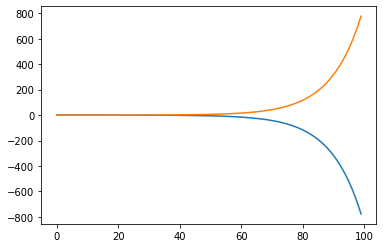

In [595]:
import matplotlib.pyplot as plt
vent = init_vent()
plt.plot(vent[:, 0])
plt.plot(vent[:, 1])